<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/SHAP_Interpretacion_Ingresos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Interpretación de predicciones con SHAP y LightGBM

Este ejercicio tiene como objetivo entrenar un modelo de clasificación sobre el conjunto de datos de ingresos (Adult Income) y aplicar SHAP para interpretar las predicciones.

## 📌 Requisitos
- `shap`
- `lightgbm`
- `scikit-learn`
- `pandas`
- `matplotlib`

Ejecutar paso a paso para comprender cómo se aplica la interpretabilidad en modelos complejos.

In [1]:
# Paso 1: Instalación de dependencias
!pip install shap lightgbm

**Descripción del conjunto de datos "Adult Income"**

**Objetivo:**

Predecir si una persona gana más de 50,000 dólares anuales, a partir de atributos personales y laborales.

Variable objetivo:
class

* <=50K: Gana menos o igual a $50,000 al año

*  >50K: Gana más de $50,000 al año

Número de instancias: aproximadamente 48,842 registros

Número de atributos: 14 atributos predictivos más 1 variable objetivo

In [2]:
# Paso 2: Cargar el dataset
import pandas as pd
from sklearn.datasets import fetch_openml

data = fetch_openml("adult", version=2, as_frame=True)
df = data.frame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Paso 3: Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder

df = df.dropna()
label_encoders = {}
for col in df.select_dtypes(include='category').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-3-4280358436>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-3-4280358436>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-3-4280358436>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [4]:
# Paso 4: Separar datos y entrenar el modelo
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 8450, number of negative: 25466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 33916, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249145 -> initscore=-1.103178
[LightGBM] [Info] Start training from score -1.103178


LGBMClassifier()

In [5]:
# Paso 5: Evaluar el modelo
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8548
           1       0.78      0.66      0.72      2758

    accuracy                           0.87     11306
   macro avg       0.84      0.80      0.82     11306
weighted avg       0.87      0.87      0.87     11306



In [6]:
# Paso 6: Aplicar SHAP
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

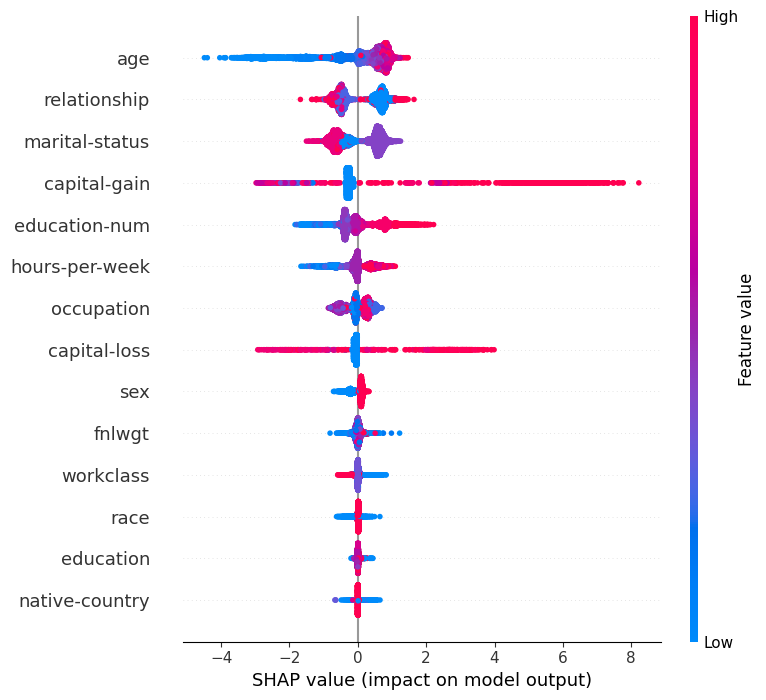

In [7]:
# Paso 7a: Visualización resumen
shap.summary_plot(shap_values, X_test)

**Conclusiones**

1. age y capital-gain son las variables con mayor impacto en la predicción del ingreso. En particular:

        * Las personas con mayor edad (age, rojo a la derecha) tienden a estar asociadas con ingresos más altos.

        * Ganancias de capital (capital-gain) altas también contribuyen fuertemente a una predicción positiva (“>50K”).

2. education-num y hours-per-week también son relevantes:

        * Valores altos en education-num (años de educación formal) están asociados con mayor ingreso.

        * A mayor número de horas trabajadas por semana, mayor probabilidad de tener ingresos altos.

3. Variables como relationship, marital-status, occupation y sex también muestran patrones:

        * Por ejemplo, el color azul hacia valores SHAP negativos en relationship y sex sugiere que ciertas relaciones familiares y el género femenino se asocian más con ingresos bajos en el modelo (un punto de alerta sobre potencial sesgo de datos o de modelo).

4. Variables como native-country, education, race y workclass tienen bajo impacto global en la predicción, lo que puede deberse a codificaciones con poco poder predictivo o a una menor correlación con el objetivo.

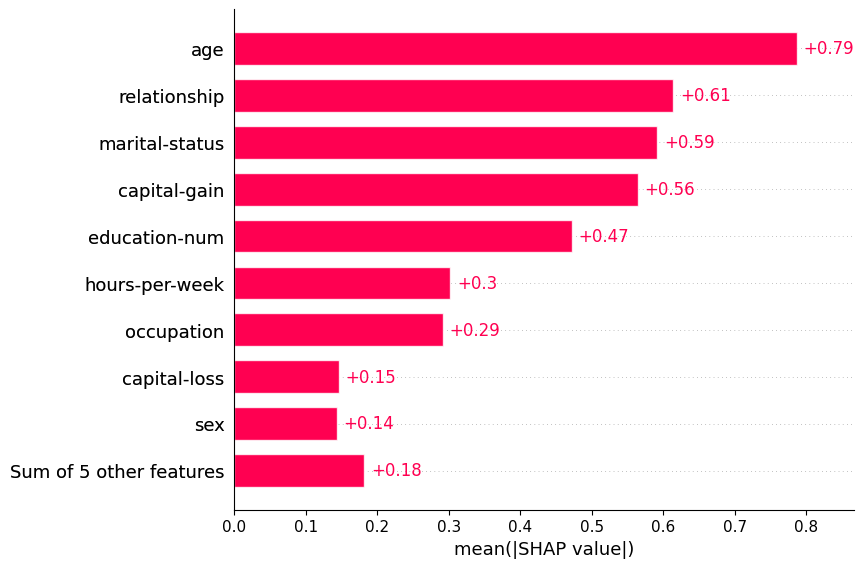

In [8]:
# Paso 7b: Visualización en barras
shap.plots.bar(shap_values)

**Conclusiones**

* age es la variable más influyente del modelo, con un impacto promedio de +0.79 en las predicciones. Esto sugiere que la edad tiene una relación fuerte y directa con el ingreso estimado: a mayor edad, mayor probabilidad de clasificar como ingreso >50K, probablemente asociado a mayor experiencia laboral.

* Las variables relationship, marital-status y capital-gain también presentan alto impacto (valores entre +0.56 y +0.61), indicando que las relaciones familiares, el estado civil y las ganancias de capital son relevantes para determinar el ingreso.

* education-num (representación numérica del nivel educativo) y hours-per-week tienen un impacto medio, lo cual está alineado con la expectativa de que mayor educación formal y mayor cantidad de horas trabajadas contribuyen positivamente a un mayor ingreso.

* Variables como occupation, capital-loss, sex y el grupo de "otras 5 variables" tienen un impacto menor, pero no despreciable. Aunque no son las más determinantes, su inclusión ayuda a mejorar la precisión del modelo.

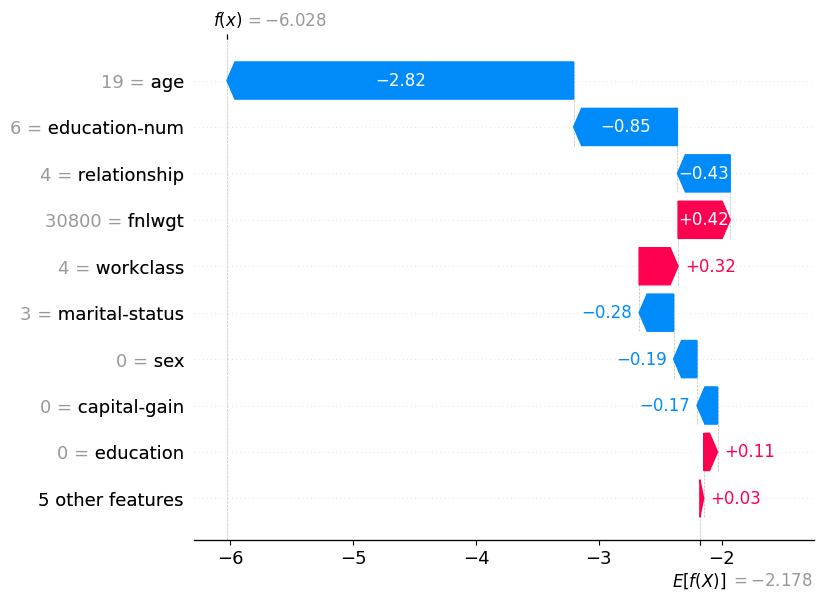

In [9]:
# Paso 7c: Interpretación individual
shap.plots.waterfall(shap_values[0])

**Conclusiones**

1. Edad = 19 años tiene un impacto negativo fuerte (-2.82) en la predicción. El modelo asume que una persona joven tiene baja probabilidad de tener ingresos altos, probablemente por falta de experiencia laboral acumulada.

2. Nivel educativo numérico = 6 (probablemente secundaria) también reduce la probabilidad de ingreso alto (-0.85), lo cual refleja una asociación aprendida por el modelo entre baja escolaridad y bajo ingreso.

3.  Variables como relationship (estado relacional), marital-status, sex, y capital-gain también aportan negativamente.

4. Solo dos variables aportan positivamente:

*   fnlwgt = 30800 (peso de la muestra censal) con +0.42

*   workclass = 4 con +0.32, indicando que ciertos tipos de trabajo pueden aumentar la probabilidad estimada de tener ingreso alto, aunque con menor influencia relativa.